**下载（加载）MNIST数据集，并查看数据集的内容**

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
#下载MNIST数据集
#训练数据（训练特征 训练标签） + 测试数据（测试特征 测试标签）
#返回训练部分和测试部分
(train_image, train_label), (test_image, test_label) = mnist.load_data()

In [4]:
#查看训练数据和测试数据的大小
print('train_data = ', len(train_image))
print('test_data = ', len(test_image))

train_data =  60000
test_data =  10000


In [5]:
#查看图片样式
print('train_image = ', train_image.shape)
print('train_label = ', train_label.shape)

train_image =  (60000, 28, 28)
train_label =  (60000,)


**数据预处理
神经网络模型：输入层（一维）--隐藏层（多维）--输出层（多维）**

In [6]:
train_image_matric = train_image.reshape(60000, 784)
test_image_matric = test_image.reshape(10000, 784)

In [7]:
#查看修改后的图片
print('train_image_matric = ', train_image_matric.shape)
print('test_image_matric = ', test_image_matric.shape)
print(train_image_matric[0])

train_image_matric =  (60000, 784)
test_image_matric =  (10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   

In [8]:
#数据集的标准化——归一化处理，去除量纲影响，让所有数据落在0~1之间

In [9]:
train_image_normalize = train_image_matric / 255
test_image_normalize = test_image_matric / 255

In [10]:
print(train_image_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
#一位有效编码处理标签
train_label_onehotencoding = np_utils.to_categorical(train_label)
test_label_onehotencoding = np_utils.to_categorical(test_label)

In [12]:
print(train_label_onehotencoding[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**多层感知器模型MLP**


$输入层: 28*28 = 784$


$隐藏层：多少隐藏层？多少神经单元？$


$输出层: 10（0到9)$

$h_1=激活函数（xw_1+b_1）  （激活函数：线性整流函数relu:f(x)=max\{0,x\}$
$y=激活函数（h_1w_2+b_2）  （激活函数：逻辑回归模型softmax，输出概率分布）$

$权重w和偏差b由数学模型正态分布随机产生$

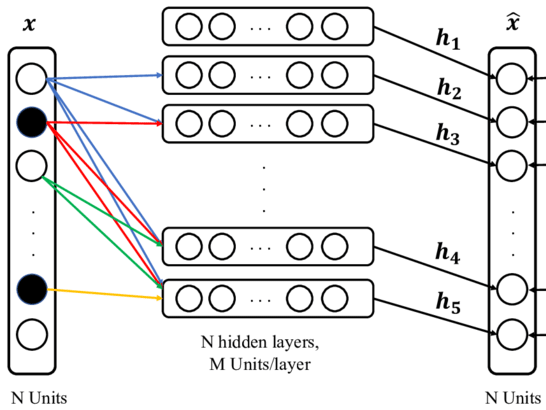

In [13]:
from keras.models import Sequential  #线性堆叠模型
from keras.layers import Dense       #神经网络层

In [14]:
model = Sequential() #建立线性堆叠的神经网络模型

建立输入层和隐藏层之间的关系

In [15]:
#units 隐藏层中神经单元的个数  input_dim 输入层神经单元的个数  normal正态分布产生权重和偏差
model.add(Dense(units = 256, input_dim = 784, kernel_initializer  = 'normal', activation = 'relu'))

建立隐藏层和输出层之间的关系

In [16]:
model.add(Dense(units = 10, kernel_initializer  = 'normal', activation = 'softmax'))

In [17]:
#每一层神经单元的关联：上一层神经单元数*本层神经单元个数 + 本层神经单元个数
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


**进行训练**

In [18]:
#配置训练模型 loss：损失函数 optimizer：优化器，让训练结果尽快收敛
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
#train_image_nomalize训练数据  train_label_onehotencoding训练标签  validation_split取出一定比例进行验证  
#epochs训练次数  batch_size每次训练数据量  verbose显示训练过程
train_history = model.fit(train_image_normalize, train_label_onehotencoding, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4391 - accuracy: 0.8826 - val_loss: 0.2207 - val_accuracy: 0.9385
Epoch 2/10
 - 1s - loss: 0.1897 - accuracy: 0.9467 - val_loss: 0.1560 - val_accuracy: 0.9561
Epoch 3/10
 - 1s - loss: 0.1330 - accuracy: 0.9619 - val_loss: 0.1251 - val_accuracy: 0.9637
Epoch 4/10
 - 1s - loss: 0.1017 - accuracy: 0.9714 - val_loss: 0.1130 - val_accuracy: 0.9655
Epoch 5/10
 - 1s - loss: 0.0804 - accuracy: 0.9771 - val_loss: 0.1013 - val_accuracy: 0.9705
Epoch 6/10
 - 1s - loss: 0.0642 - accuracy: 0.9816 - val_loss: 0.0920 - val_accuracy: 0.9720
Epoch 7/10
 - 1s - loss: 0.0529 - accuracy: 0.9858 - val_loss: 0.0840 - val_accuracy: 0.9735
Epoch 8/10
 - 1s - loss: 0.0432 - accuracy: 0.9881 - val_loss: 0.0807 - val_accuracy: 0.9746
Epoch 9/10
 - 1s - loss: 0.0361 - accuracy: 0.9908 - val_loss: 0.0789 - val_accuracy: 0.9758
Epoch 10/10
 - 1s - loss: 0.0295 - accuracy: 0.9929 - val_loss: 0.0804 - val_accuracy: 0.9761


In [20]:
print(train_history.history['accuracy'])
print('-------------------------------------------------------------------------')
print(train_history.history['val_accuracy'])
print('-------------------------------------------------------------------------')
print(train_history.history['loss'])
print('-------------------------------------------------------------------------')
print(train_history.history['val_loss'])

[0.8826042, 0.9466875, 0.9619375, 0.9714375, 0.9770833, 0.98158336, 0.9858125, 0.98810416, 0.99075, 0.99291664]
-------------------------------------------------------------------------
[0.9384999871253967, 0.956083357334137, 0.9636666774749756, 0.965499997138977, 0.9704999923706055, 0.972000002861023, 0.9735000133514404, 0.9745833277702332, 0.9757500290870667, 0.9760833382606506]
-------------------------------------------------------------------------
[0.43913837168365716, 0.1896862807062765, 0.13303714062397679, 0.10169459919755658, 0.08040962601080537, 0.0642300592114528, 0.052897172595839946, 0.043236928390494235, 0.036133601427233465, 0.029538407343594978]
-------------------------------------------------------------------------
[0.2207023889447252, 0.15600433455159265, 0.12510246752450863, 0.1129884637426585, 0.1013331496467193, 0.09202096407922605, 0.08396294811585298, 0.08074431032097588, 0.0789297827364256, 0.08038131380841756]


In [21]:
import matplotlib.pyplot as plt
def show_train_history(history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
    

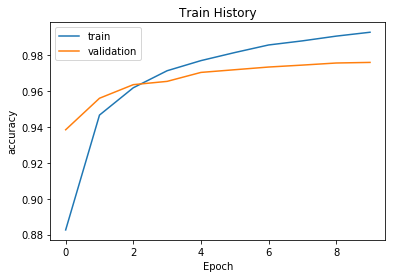

In [22]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

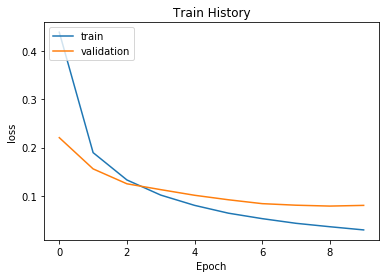

In [23]:
show_train_history(train_history, 'loss', 'val_loss')

**利用10000项测试数据评估模型准确率**

In [24]:
scores = model.evaluate(test_image_normalize, test_label_onehotencoding)
print(scores)

10000/10000 [==============================] - 0s 32us/step
[0.07180518592225853, 0.9779000282287598]


**预测图片**

In [25]:
from PIL import Image

In [26]:
img0 = Image.open('610.bmp')
img1 = Image.open('611.bmp')
img2 = Image.open('612.bmp')
img3 = Image.open('613.bmp')
img4 = Image.open('614.bmp')
img5 = Image.open('615.bmp')

In [27]:
def predict(img):
    number_data = img.getdata()
    number_data_array = np.array(number_data)
    number_data_array = number_data_array.reshape(1, 784)
    number_data_nomalize = number_data_array / 255
    prediction = model.predict(number_data_nomalize)
    print(prediction)
    np.max(prediction)
    print('number :', np.argmax(prediction))
    print('-------------------------------------------------------------------------')

In [28]:
predict(img0)
predict(img1)
predict(img2)
predict(img3)
predict(img4)
predict(img5)

[[3.6631578e-10 3.4788633e-07 1.2949266e-07 9.9991834e-01 1.1530434e-15
  7.9512240e-05 1.1310274e-13 3.2971609e-12 1.6489056e-06 3.2478702e-08]]
number : 3
-------------------------------------------------------------------------
[[6.6372838e-11 5.2982546e-07 2.6434807e-05 9.9856359e-01 2.6687965e-14
  7.8496322e-07 3.6929192e-13 3.8514513e-12 1.4087005e-03 2.9322434e-12]]
number : 3
-------------------------------------------------------------------------
[[3.3302183e-07 3.9452240e-07 7.4113280e-01 2.5740772e-01 1.4220853e-04
  4.6719785e-07 3.0991916e-05 1.2654305e-03 1.1986969e-05 7.6605611e-06]]
number : 2
-------------------------------------------------------------------------
[[3.1138585e-14 1.7409268e-09 2.0666207e-06 9.9999797e-01 2.0088189e-13
  3.5548859e-09 6.8900730e-16 4.4426423e-18 7.1683098e-10 7.5342746e-11]]
number : 3
-------------------------------------------------------------------------
[[2.7247983e-08 2.4935291e-06 2.5727202e-05 9.9988270e-01 8.7341689e-08
  1.

**导出训练完毕的模型**

In [29]:
model.save('number_model.h5')